# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
unit= "imperial"
url= f"{base_url}&appid={weather_api_key}&units={unit}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port moresby
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | san antonio de pale
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | pljevlja
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | el nido
Processing Record 9 of Set 1 | minas de marcona
Processing Record 10 of Set 1 | sao gabriel da cachoeira
Processing Record 11 of Set 1 | vikhorevka
Processing Record 12 of Set 1 | eilat
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | porangatu
Processing Record 16 of Set 1 | timbuktu
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 |

Processing Record 43 of Set 4 | puerto armuelles
Processing Record 44 of Set 4 | howrah
Processing Record 45 of Set 4 | kapuskasing
Processing Record 46 of Set 4 | yanykurgan
Processing Record 47 of Set 4 | poronaysk
Processing Record 48 of Set 4 | kourou
Processing Record 49 of Set 4 | talnakh
Processing Record 0 of Set 5 | itaituba
Processing Record 1 of Set 5 | berezeni
Processing Record 2 of Set 5 | punta arenas
Processing Record 3 of Set 5 | dongcun
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | mount pearl
Processing Record 6 of Set 5 | vila velha
Processing Record 7 of Set 5 | pizarro
Processing Record 8 of Set 5 | sittwe
Processing Record 9 of Set 5 | ishigaki
Processing Record 10 of Set 5 | aldan
Processing Record 11 of Set 5 | tadine
Processing Record 12 of Set 5 | elliot lake
Processing Record 13 of Set 5 | tazacorte
Processing Record 14 of Set 5 | karaton
Processing Record 15 of Set 5 | pingliang
Processing Record 16 of Set 5 | acarau
Processing Re

Processing Record 30 of Set 8 | raduzhny
Processing Record 31 of Set 8 | crane
Processing Record 32 of Set 8 | opuwo
Processing Record 33 of Set 8 | itoman
Processing Record 34 of Set 8 | ivdel'
Processing Record 35 of Set 8 | anna regina
Processing Record 36 of Set 8 | san julian
Processing Record 37 of Set 8 | nabire
Processing Record 38 of Set 8 | tinajo
Processing Record 39 of Set 8 | cadale
Processing Record 40 of Set 8 | inirida
Processing Record 41 of Set 8 | saynshand
Processing Record 42 of Set 8 | castillos
Processing Record 43 of Set 8 | walvis bay
Processing Record 44 of Set 8 | shingu
Processing Record 45 of Set 8 | tulun
Processing Record 46 of Set 8 | yermakovskoye
Processing Record 47 of Set 8 | yangor
City not found. Skipping...
Processing Record 48 of Set 8 | new norfolk
Processing Record 49 of Set 8 | kasangulu
Processing Record 0 of Set 9 | bartica
Processing Record 1 of Set 9 | satsuma
Processing Record 2 of Set 9 | pyapon
Processing Record 3 of Set 9 | dumas
Proce

Processing Record 19 of Set 12 | luena
Processing Record 20 of Set 12 | labytnangi
Processing Record 21 of Set 12 | 'amran
City not found. Skipping...
Processing Record 22 of Set 12 | villa gesell
Processing Record 23 of Set 12 | kaa-khem
Processing Record 24 of Set 12 | bagayevskaya
Processing Record 25 of Set 12 | broome
Processing Record 26 of Set 12 | ouadda
Processing Record 27 of Set 12 | desaguadero
Processing Record 28 of Set 12 | christchurch
Processing Record 29 of Set 12 | kosh-agach
Processing Record 30 of Set 12 | puerto baquerizo moreno
Processing Record 31 of Set 12 | yagry
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port moresby,-9.4431,147.1797,74.62,83,20,5.75,PG,1689351729
1,vorgashor,67.5833,63.9500,61.32,65,7,7.61,RU,1689351597
2,san antonio de pale,-1.4014,5.6325,73.45,83,27,9.98,GQ,1689351997
3,port-aux-francais,-49.3500,70.2167,36.91,58,93,30.80,TF,1689351590
4,pljevlja,43.3333,19.3333,79.23,66,9,4.18,ME,1689351997


In [31]:
# Drop cities that weren't found before exporting to csv
city_data_df = city_data_df.dropna(how = "any")

In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label = "City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col = "City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port moresby,-9.4431,147.1797,74.62,83,20,5.75,PG,1689351729
1,vorgashor,67.5833,63.9500,61.32,65,7,7.61,RU,1689351597
2,san antonio de pale,-1.4014,5.6325,73.45,83,27,9.98,GQ,1689351997
3,port-aux-francais,-49.3500,70.2167,36.91,58,93,30.80,TF,1689351590
4,pljevlja,43.3333,19.3333,79.23,66,9,4.18,ME,1689351997


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

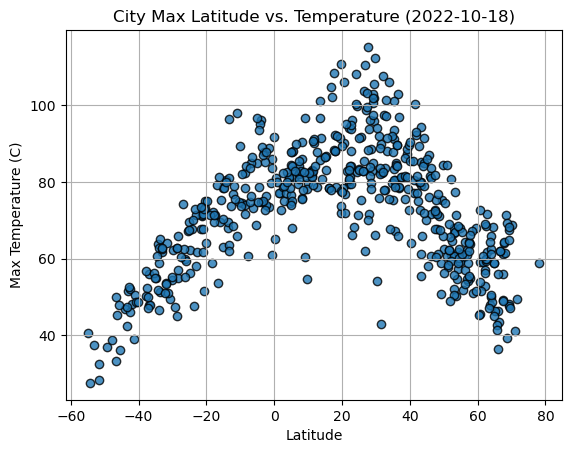

In [34]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]
plt.scatter(x_value, y_value, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title ("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

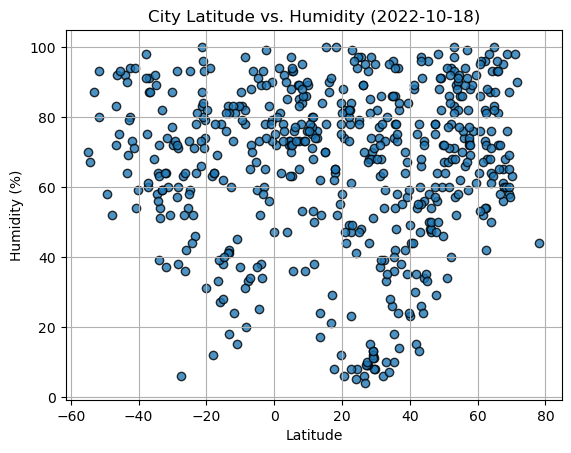

In [35]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df["Lat"]
y_value = city_data_df["Humidity"]
plt.scatter(x_value, y_value, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title ("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

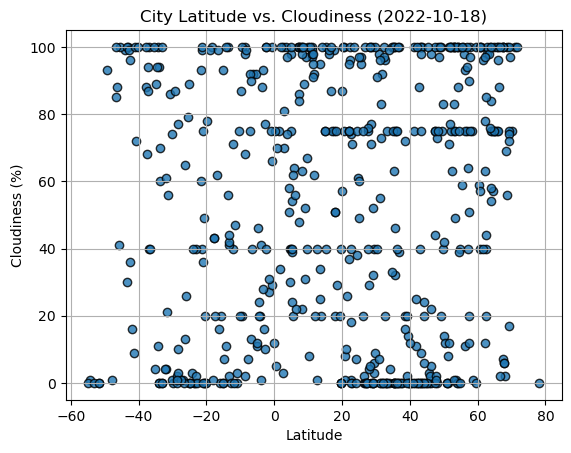

In [36]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df["Lat"]
y_value = city_data_df["Cloudiness"]
plt.scatter(x_value, y_value, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title ("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

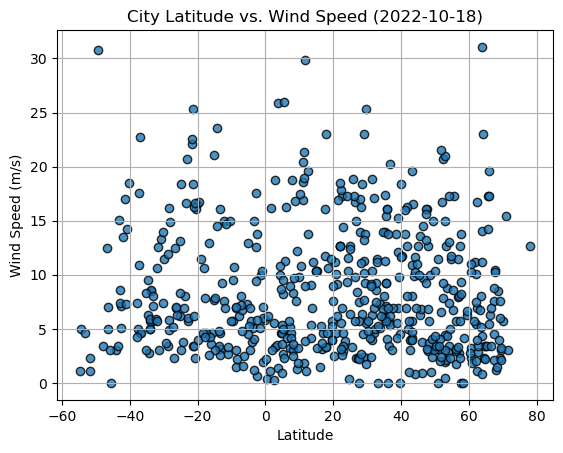

In [37]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df["Lat"]
y_value = city_data_df["Wind Speed"]
plt.scatter(x_value, y_value, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title ("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def linear_regression_plot (x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get the regression value
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(8,5))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, (20,20), fontsize=15, color="red")
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vorgashor,67.5833,63.9500,61.32,65,7,7.61,RU,1689351597
4,pljevlja,43.3333,19.3333,79.23,66,9,4.18,ME,1689351997
5,vilyuchinsk,52.9306,158.4028,52.07,97,100,0.45,RU,1689351611
6,aasiaat,68.7098,-52.8699,39.36,98,100,8.52,GL,1689351673
7,el nido,11.1858,119.3956,81.46,80,100,20.47,PH,1689351998


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port moresby,-9.4431,147.1797,74.62,83,20,5.75,PG,1689351729
2,san antonio de pale,-1.4014,5.6325,73.45,83,27,9.98,GQ,1689351997
3,port-aux-francais,-49.3500,70.2167,36.91,58,93,30.80,TF,1689351590
8,minas de marcona,-15.2119,-75.1103,63.05,62,93,7.67,PE,1689351440
9,sao gabriel da cachoeira,-0.1303,-67.0892,91.69,47,12,5.82,BR,1689351998


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.40053387916285144


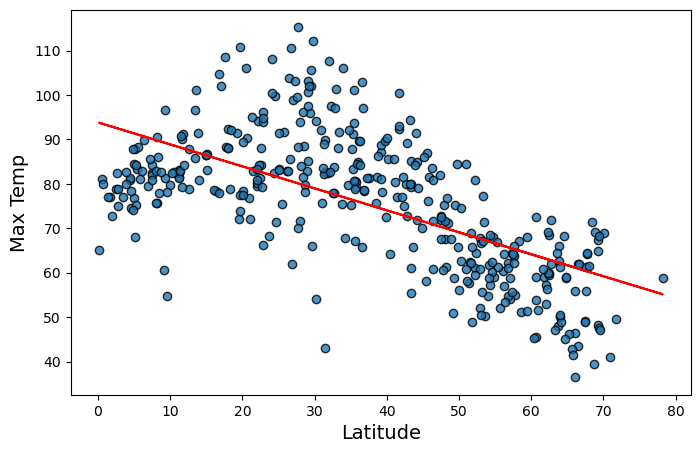

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plot(x_values, y_values, "Latitude", "Max Temp", "Northern", (10, 10))

# Save the figure
plt.savefig("output_data/Fig5.png")

plt.show()

The r-value is: 0.7616054284473429


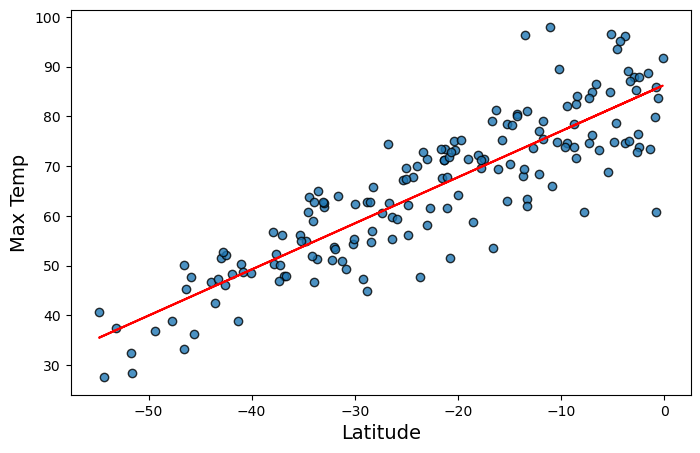

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression_plot(x_values, y_values, "Latitude", "Max Temp", "Southern", (10, 10))

# Save the figure
plt.savefig("output_data/Fig6.png")

plt.show()

####  The  the r-value between max temperature and latitude for the Northern Hemisphere is 0.4, which indicates that there's a moderate positive correlation between them. For the Southern Hemisphere, however, an r-value of 0.7, indicates a strong positive correlation between max temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.004867484314631308


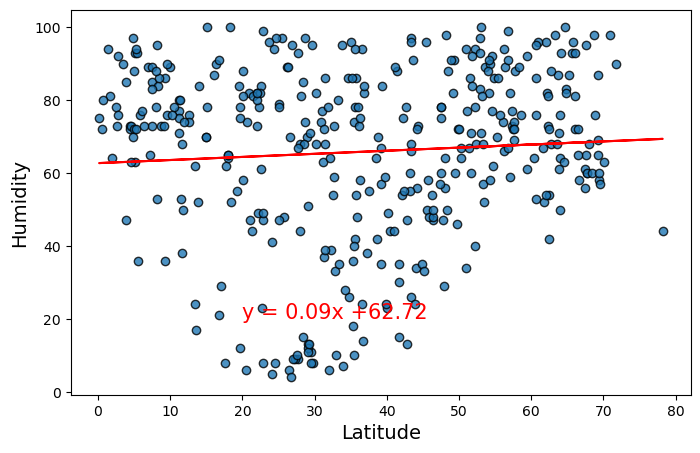

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression_plot(x_values, y_values, "Latitude", "Humidity", "Northern", (10, 10))

# Save the figure
plt.savefig("output_data/Fig7.png")

plt.show()

The r-value is: 0.030553148636576512


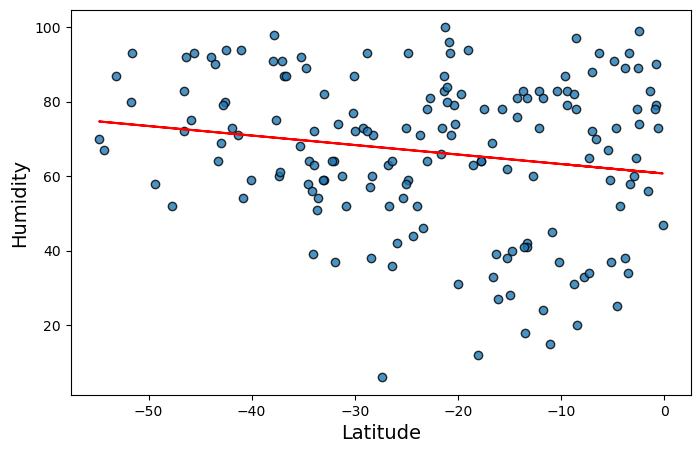

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression_plot(x_values, y_values, "Latitude", "Humidity", "Southern", (10, 10))

# Save the figure
plt.savefig("output_data/Fig8.png")

plt.show()

#### The r-value between latitude and humidity for the Northern and Southern Hemispheres is 0.004 and 0.03 respectively. This indicates that there's no correlation between them for either Hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0004464029004638566


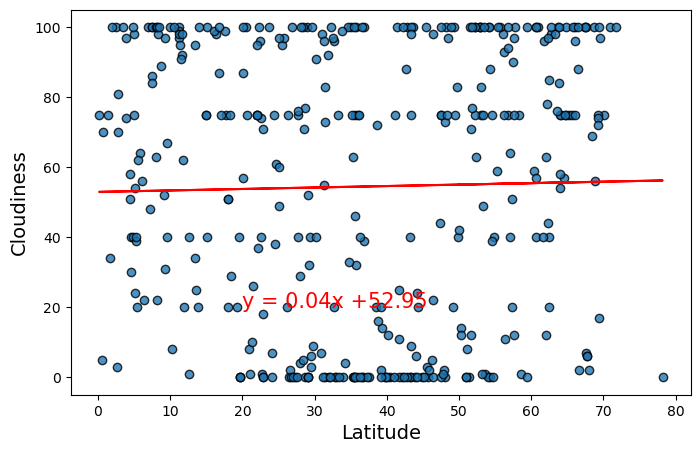

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness", "Northern", (10, 10))

# Save the figure
plt.savefig("output_data/Fig9.png")

plt.show()

The r-value is: 0.0012983295945160928


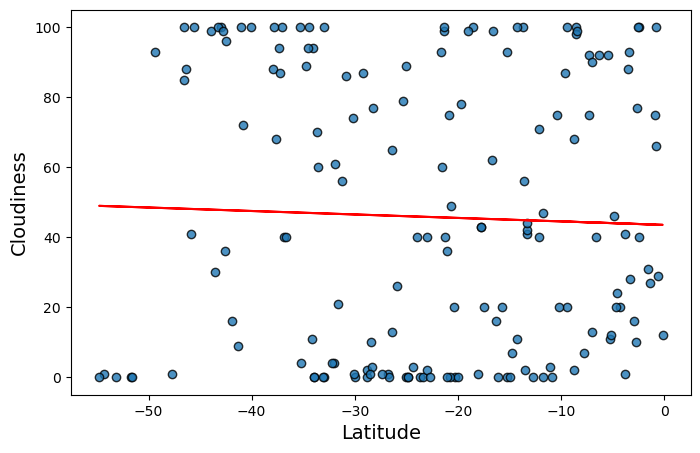

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness", "Southern", (10, 10))

# Save the figure
plt.savefig("output_data/Fig10.png")

plt.show()

#### The r-value between latitude and cloudiness for the Northern and the Southern Hemispheres is 0.0004 and 0.001 respectively. This shows that no correlation exists between them for either Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0066610562218498304


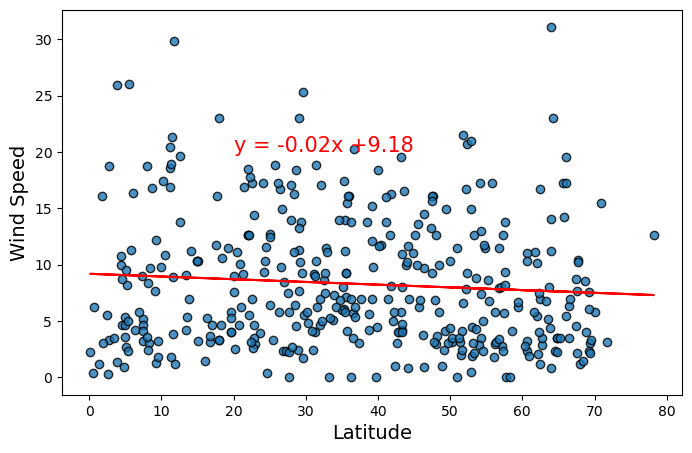

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed", "Northern", (10, 10))

# Save the figure
plt.savefig("output_data/Fig11.png")

plt.show()

The r-value is: 0.001934419111005839


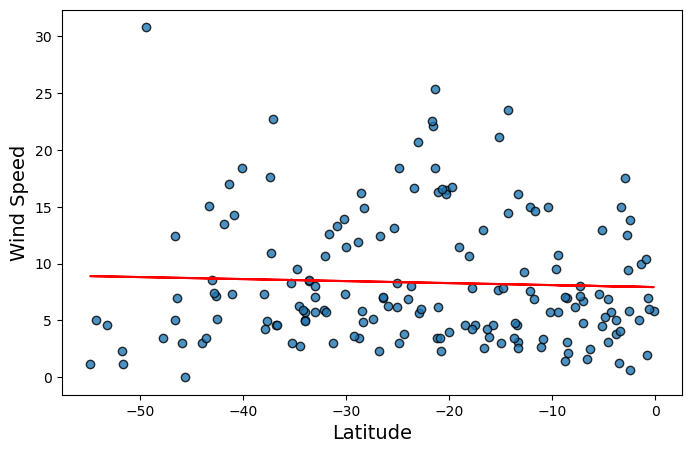

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed", "Southern", (10, 10))

# Save the figure
plt.savefig("output_data/Fig12.png")

plt.show()

#### The r-value between latitude and wind speed for the Northern and the Southern Hemispheres is 0.006 and 0.001 respecitvely. This indicates that there's no correlation between the two for either Hemispheres.